In [8]:
import ROOT

# access file data.root and read the ttree in

In [9]:
inputFile =  ROOT.TFile("data.root")
tree = inputFile.Get("sig")

# create the sum of an exponential and a gaussian to fit the data

In [10]:
x = ROOT.RooRealVar("x", "x", 0., 1000.);
oneovertau = ROOT.RooRealVar("oneovertau", "oneovertau", -0.02, -0.1, -0.003)
sigma = ROOT.RooRealVar("sigma", "sigma", 1., 0.001, 10.)
mass = ROOT.RooRealVar("mass", "mass",  114., 200.)
nbkg = ROOT.RooRealVar("nbkg", "nbkg", 10000., 50000.)
nsig = ROOT.RooRealVar("nsig", "nsig", 1000., 3000.)
expo = ROOT.RooExponential("expo","expoonential function", x, oneovertau)
gaus = ROOT.RooGaussian("gaus", "gaussian function", x, mass, sigma)
modelSB = ROOT.RooAddPdf("modelSB","modelSB", ROOT.RooArgList(gaus,expo), ROOT.RooArgList(nsig,nbkg))

# convert the ttree in a RooDataset

In [11]:
data = ROOT.RooDataSet("data","dataset with x", tree, ROOT.RooArgSet(x))
data.Print()

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision.
RooDataSet::data[x] = 7958 entries


# fit the model to the data

In [12]:
resSB = modelSB.fitTo(data, ROOT.RooFit.Save(True), ROOT.RooFit.Minos(True))

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaus,expo)
 **********
 **   15 **SET PRINT           1
 **********
 **********
 **   16 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mass         1.57000e+02  8.60000e+00    1.14000e+02  2.00000e+02
     2 nbkg         3.00000e+04  4.00000e+03    1.00000e+04  5.00000e+04
     3 nsig         2.00000e+03  2.00000e+02    1.00000e+03  3.00000e+03
     4 oneovertau  -2.00000e-02  8.50000e-03   -1.00000e-01 -3.00000e-03
     5 sigma        1.00000e+00  4.99500e-01    1.00000e-03  1.00000e+01
 **********
 **   17 **SET ERR         0.5
 **********
 **********
 **   18 **SET PRINT           1
 **********
 **********
 **   19 **SET STR

# plot the results

[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) directly selected PDF components: (expo)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) indirectly selected PDF components: ()


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


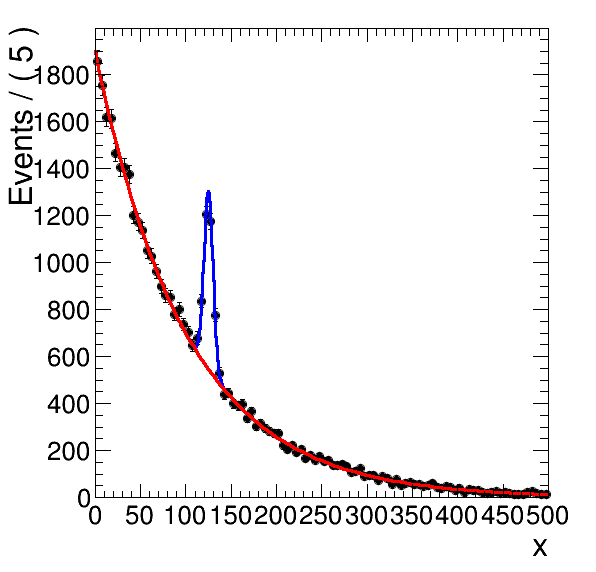

In [10]:
xframe = x.frame(ROOT.RooFit.Title("expoRooFit.C"),ROOT.RooFit.Bins(100),ROOT.RooFit.Range(0.,500.))
data.plotOn(xframe)
modelSB.plotOn(xframe)
modelSB.plotOn(xframe, ROOT.RooFit.Components('expo'), ROOT.RooFit.LineColor(ROOT.kRed))
xframe.Draw()
ROOT.gPad.Draw()

# redo it by hand and then construct the profile in mass of the resonance

## 1. create the NLL

In [11]:
nll = modelSB.createNLL(data)

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.


## 2. instantiate Minuit with that likelihood and minimize

In [12]:
ROOT.RooMinuit(nll).migrad()

0

 **********
 **   13 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-159481 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  mass         1.25026e+02   2.14387e-01   7.45680e-03   2.69777e-02
   2  nbkg         3.80266e+04   2.03628e+02   1.11162e-02   1.10405e-02
   3  nsig         1.90747e+03   7.30546e+01   7.34370e-02  -1.44471e-03
   4  oneovertau  -9.98563e-03   5.14719e-05   2.05265e-03  -4.39567e-01
   5  sigma        5.01227e+00   2.16018e-01   4.32215e-02  -1.36570e-02
                               ERR DEF= 0.5
 MIGRAD FAILS TO FIND IMPROVEMENT
 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=-1

## 3. Do the profile in the parameter of interest (mass)

In [13]:
profile = nll.createProfile(mass)

## 4. plot


[#1] INFO:Minization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) minimum found at (mass=125.026)
..................................................................................

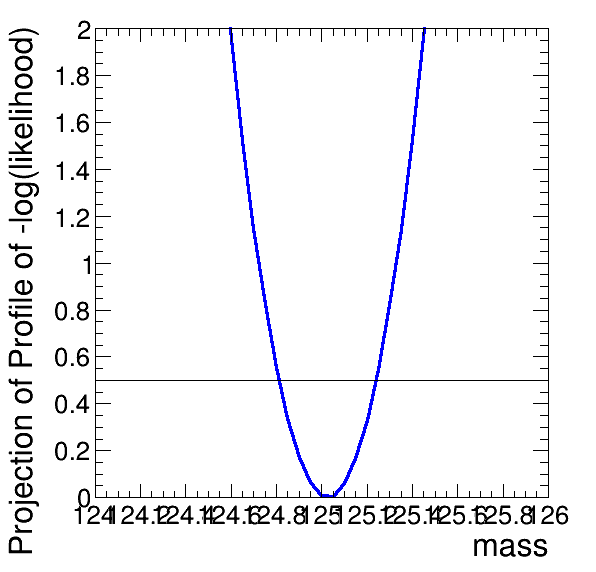

In [16]:
frame1 = mass.frame(ROOT.RooFit.Bins(20), ROOT.RooFit.Range(124,126), ROOT.RooFit.Title("profileLL in mass"))
profile.plotOn(frame1)
frame1.GetYaxis().SetRangeUser(0, 2)
frame1.Draw()
line = ROOT.TLine(124, 0.5, 126, 0.5)
line.Draw("sames")
ROOT.gPad.Draw()